In [1]:
from qcportal import FractalClient
from qcportal.models.records import RecordStatusEnum
from openff.qcsubmit.common_structures import QCSpec, SCFProperties
from openff.qcsubmit.factories import OptimizationDatasetFactory
from openff.qcsubmit import workflow_components
import numpy as np
from qcelemental.models.results import WavefunctionProtocolEnum
from qcportal.models.common_models import DriverEnum
from openeye import oechem
from openff.qcsubmit.results.filters import (
    ConformerRMSDFilter, ConnectivityFilter,
    ElementFilter,
    HydrogenBondFilter,
    SMARTSFilter,
    RecordStatusFilter,
    ResultRecordFilter,
)

from openff.qcsubmit.results import (
    OptimizationResultCollection,)

In [2]:
default_filters = [
        RecordStatusFilter(status=RecordStatusEnum.complete),
        ConnectivityFilter(tolerance=1.2),
        ElementFilter(
            # The elements supported by SMIRNOFF
            allowed_elements=["H", "C", "N", "O", "S", "P", "F", "Cl", "Br", "I"]
        ),
    ]

# Pull down the optimization datasets
client = FractalClient()

optimization_set = OptimizationResultCollection.from_server(client=client,
                                                           datasets=["OpenFF Discrepancy Benchmark 1",
                                                                     "OpenFF Gen 2 Opt Set 2 Coverage",
                                                                     "OpenFF Gen 2 Opt Set 4 eMolecules Discrepancy",
                                                                     "SMIRNOFF Coverage Set 1",
                                                                     "OpenFF Ehrman Informative Optimization v0.2",
                                                                     "FDA optimization dataset 1",
                                                                     "Kinase Inhibitors: WBO Distributions",
#"OpenFF Optimization Set 1", No iodine containing mols
#"OpenFF Gen 2 Opt Set 1 Roche", No iodine containing mols
#"OpenFF Gen 2 Opt Set 3 Pfizer Discrepancy", No iodine containing mols
#"OpenFF Gen 2 Opt Set 5 Bayer", No iodine containing mols

                                                                     ])

smarts_to_include = ["[#53:1]"]

optimization_set = optimization_set.filter(*default_filters,
                                            SMARTSFilter(smarts_to_include=smarts_to_include))

with open("iodine-matches-in-opt-sets.json", "w") as file:
    file.write(optimization_set.json())

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 14, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15, aromatic: False, chiral: True
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 33, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 11, 

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 17, aromatic: True, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 1

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 11, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 11, ar

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 11, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 11, 

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 17, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 14, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 18, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 17, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 14, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 18

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 14, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 7, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 14, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 7, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 13, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 12, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 3, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 14, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 14, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15, aromatic: False, chiral: True
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 33, 

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 17, aromatic: True, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 1

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 11, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 11, ar

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 13, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 3, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 18, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 14, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 11, 

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 17, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 14, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 18, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 17, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 14, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 18

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 14, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 7, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 14, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 7, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic bonds are: [<openeye.oechem.OEBondBase; proxy of <Swig Object of type 'OEChem::OEBondBase *' at 0x7fba9c71ce70> >]

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 11, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 13, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: Fa

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 17, aromatic: True, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 1

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 17, aromatic: True, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 11, 

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 19, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 18, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 10, aromatic: False, chiral: True
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 20, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 13, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 3, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 18, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 14, 

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 17, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 14, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 18, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 17, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 14, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 18

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 14, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 7, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 14, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 7, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 12, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 10, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 19, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic bonds are: [<openeye.oechem.OEBondBase; proxy of <Swig Object of type 'OEChem::OEBondBase *' at 0x7fbaaf094ab0> >]

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: 

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 17, aromatic: True, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 1

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 17, aromatic: True, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 1

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 12, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 31, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: True, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 12, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 31, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13,

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 17, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 14, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 18, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 17, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 14, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 18

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 14, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 7, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 14, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 7, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 11, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 11, 

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 17, aromatic: True, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 1

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 17, aromatic: True, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 24, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 1

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 12, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 31, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: True, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 12, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 31, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13,

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 17, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 14, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 18, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 17, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 14, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 18

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 14, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 7, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 14, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 7, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 11, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 4, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 11, 

In [3]:
len(optimization_set.entries['https://api.qcarchive.molssi.org:443/'])

368

In [4]:
records_and_molecules = optimization_set.to_records()

In [22]:
from openff.toolkit.topology import Molecule
from openmm import unit

# Translating positions so that these won't match the earlier records and populated by old data
molecules = []
for item in records_and_molecules:
    mol = Molecule.from_mapped_smiles(item[1].to_smiles(mapped=True), allow_undefined_stereo=True)
    mol.add_conformer((item[1].conformers[0].value_in_unit(unit.bohr) + 2) * unit.bohr)
    molecules.append(mol)

In [23]:
factory = OptimizationDatasetFactory()
factory.add_workflow_components(workflow_components.StandardConformerGenerator(max_conformers=50))
factory.dict()

{'qc_specifications': {'default': {'method': 'B3LYP-D3BJ',
   'basis': 'DZVP',
   'program': 'psi4',
   'spec_name': 'default',
   'spec_description': 'Standard OpenFF optimization quantum chemistry specification.',
   'store_wavefunction': 'none',
   'implicit_solvent': None,
   'maxiter': 200,
   'scf_properties': ['dipole',
    'quadrupole',
    'wiberg_lowdin_indices',
    'mayer_indices'],
   'keywords': None}},
 'driver': 'gradient',
 'priority': 'normal',
 'dataset_tags': ['openff'],
 'compute_tag': 'openff',
 'type': 'OptimizationDatasetFactory',
 'workflow': [{'type': 'StandardConformerGenerator',
   'rms_cutoff': None,
   'max_conformers': 50,
   'clear_existing': True}],
 'optimization_program': {'program': 'geometric',
  'coordsys': 'dlc',
  'enforce': 0.0,
  'epsilon': 1e-05,
  'reset': True,
  'qccnv': False,
  'molcnv': False,
  'check': 0,
  'trust': 0.1,
  'tmax': 0.3,
  'maxiter': 300,
  'convergence_set': 'GAU',
  'constraints': {}}}

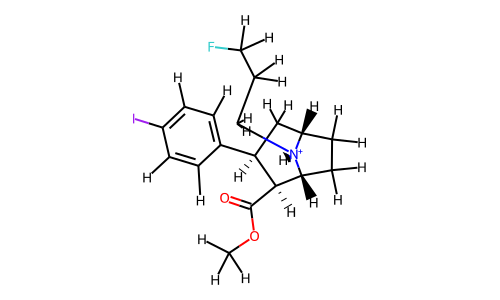

[H:24][c:1]1[c:3]([c:6]([c:4]([c:2]([c:5]1[C@@:11]2([C@:12]([C@:14]3([C:9]([C:8]([C@@:13]([C:10]2([H:32])[H:33])([N@@+:19]3([H:47])[C:17]([H:43])([H:44])[C:16]([H:41])([H:42])[C:18]([H:45])([H:46])[F:22])[H:36])([H:28])[H:29])([H:30])[H:31])[H:37])([H:35])[C:7](=[O:20])[O:21][C:15]([H:38])([H:39])[H:40])[H:34])[H:25])[H:27])[I:23])[H:26]


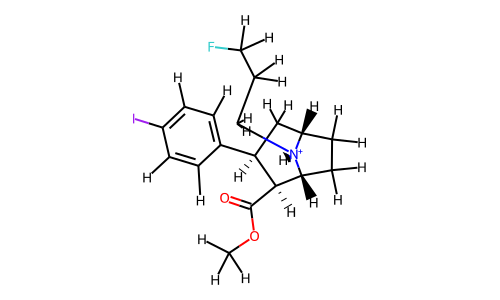

[H:24][c:1]1[c:3]([c:6]([c:4]([c:2]([c:5]1[C@@:11]2([C@:12]([C@:14]3([C:9]([C:8]([C@@:13]([C:10]2([H:32])[H:33])([N@@+:19]3([H:47])[C:17]([H:43])([H:44])[C:16]([H:41])([H:42])[C:18]([H:45])([H:46])[F:22])[H:36])([H:28])[H:29])([H:30])[H:31])[H:37])([H:35])[C:7](=[O:20])[O:21][C:15]([H:38])([H:39])[H:40])[H:34])[H:25])[H:27])[I:23])[H:26]


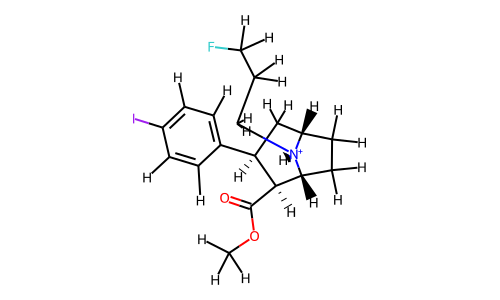

[H:24][c:1]1[c:3]([c:6]([c:4]([c:2]([c:5]1[C@@:11]2([C@:12]([C@:14]3([C:9]([C:8]([C@@:13]([C:10]2([H:32])[H:33])([N@@+:19]3([H:47])[C:17]([H:43])([H:44])[C:16]([H:41])([H:42])[C:18]([H:45])([H:46])[F:22])[H:36])([H:28])[H:29])([H:30])[H:31])[H:37])([H:35])[C:7](=[O:20])[O:21][C:15]([H:38])([H:39])[H:40])[H:34])[H:25])[H:27])[I:23])[H:26]


In [27]:
# Excluding the problematic molecules, 365 to 368 that fail isomorphic check in qcsubmit
for i in range(3):
    display(molecules[i+365].visualize())
    print(molecules[i+365].to_smiles(mapped=True))

In [25]:
dataset = factory.create_dataset(dataset_name="OpenFF Iodine Chemistry Optimization Dataset v1.0", molecules=molecules[0:364], tagline="Optimization set created from Gen1, Gen2, and other dataset molecules containing iodine", description="Molecules containing iodine with the correct auxiliary basis set for DZVP")

Preparation                   : 100%|███████████| 99/99 [00:06<00:00, 16.04it/s]


In [26]:
confs = np.array([len(mol.conformers) for mol in dataset.molecules])

print("Number of unique molecules       ", dataset.n_molecules)
print("Number of filtered molecules     ", dataset.n_filtered)
print("Number of conformers             ", dataset.n_records)
print("Number of conformers min mean max",
      confs.min(), "{:6.2f}".format(confs.mean()), confs.max())

masses = []
for molecule in dataset.molecules:
    oemol = molecule.to_openeye()
    mass = oechem.OECalculateMolecularWeight(oemol)
    masses.append(mass)

print(f'Mean molecular weight: {np.mean(np.array(masses)):.2f}')
print(f'Max molecular weight: {np.max(np.array(masses)):.2f}')
print("Charges:", sorted(set(m.total_charge/m.total_charge.unit for m in dataset.molecules)))

Number of unique molecules        99
Number of filtered molecules      0
Number of conformers              327
Number of conformers min mean max 1   3.30 22
Mean molecular weight: 318.53
Max molecular weight: 533.92
Charges: [-1.0, 0.0, 1.0]


In [28]:
dataset.visualize("dataset.pdf")

In [29]:
dataset.metadata.submitter = 'Pavan Behara'

In [30]:
dataset.metadata.long_description_url = 'https://github.com/openforcefield/qca-dataset-submission/tree/master/submissions/2022-07-27-OpenFF-iodine-optimization-set'

In [31]:
dataset.metadata

Metadata(submitter='Pavan Behara', creation_date=datetime.date(2022, 7, 27), collection_type='OptimizationDataset', dataset_name='OpenFF Iodine Chemistry Optimization Dataset v1.0', short_description='Optimization set created from Gen1, Gen2, and other dataset molecules containing iodine', long_description_url=HttpUrl('https://github.com/openforcefield/qca-dataset-submission/tree/master/submissions/2022-07-27-OpenFF-iodine-optimization-set', scheme='https', host='github.com', tld='com', host_type='domain', port='443', path='/openforcefield/qca-dataset-submission/tree/master/submissions/2022-07-27-OpenFF-iodine-optimization-set'), long_description='Molecules containing iodine with the correct auxiliary basis set for DZVP', elements={'Cl', 'S', 'Br', 'O', 'F', 'H', 'C', 'N', 'I'})

In [32]:
dataset.export_dataset("dataset.json.bz2")